In [128]:

solid = 'X<>||#?SQ'

all_levels = ['mario-1-1.txt_0',
              'mario-1-1.txt_1',
              'mario-1-1.txt_10',
              'mario-1-1.txt_11',
              'mario-1-1.txt_12',
              'mario-1-1.txt_13',
              'mario-1-1.txt_14',
              'mario-1-1.txt_15',
              'mario-1-1.txt_16',
              'mario-1-1.txt_17',
              'mario-1-1.txt_18',
              'mario-1-1.txt_19',
              'mario-1-1.txt_2',
              'mario-1-1.txt_20',
              'mario-1-1.txt_21',
              'mario-1-1.txt_22',
              'mario-1-1.txt_23',
              'mario-1-1.txt_24',
              'mario-1-1.txt_25',
              'mario-1-1.txt_26',
              'mario-1-1.txt_27',
              'mario-1-1.txt_28',
              'mario-1-1.txt_29',
              'mario-1-1.txt_3',
              'mario-1-1.txt_4',
              'mario-1-1.txt_5',
              'mario-1-1.txt_6',
              'mario-1-1.txt_7',
              'mario-1-1.txt_8',
              'mario-1-1.txt_9']

In [129]:

jumps = []
falls = []


for filename in all_levels:

    filename = 'SMB_TestData/' + filename
    level = []
    with open(filename) as infile:
        for line in infile:
            level.append(line.rstrip())
    level_ = list(reversed(level))
    width = len(level[0])
    height = len(level)

    start = None
    for x in range(width):
        previous_solid = False
        for y in range(height):
            if level_[y][x] == '*' and previous_solid:
                start = (x,y)
            elif level_[y][x] in solid:
                previous_solid = True
            else:
                previous_solid = False
            if start:
                break
        if start:
            break

    prev_y = start[1]
    prev_on_ground = True
    path_snippets = []

    for x in range(start[0]+1,width):
        player_locations = []

        for y in range(height):
            if level_[y][x] == '*':
                player_locations.append((x,y))
        current_y = player_locations[-1][1]
        current_on_ground = level_[current_y-1][x] in solid


        if len(player_locations) > 1:
            if prev_on_ground and not current_on_ground:
                path_snippets.append((x-1,prev_y))
            path_snippets += player_locations
            prev_y = current_y
            prev_on_ground = current_on_ground

        elif current_on_ground and not prev_on_ground:
            path_snippets.append((x,current_y))
        elif prev_on_ground and not current_on_ground:
            path_snippets.append((x-1,prev_y))
            path_snippets.append((x,current_y))
        elif not prev_on_ground and not current_on_ground:
            path_snippets.append((x,current_y))
        prev_y = current_y
        prev_on_ground = current_on_ground


    px = -100
    py = -100
    falling = False
    snippet = []
    snippets = []
    for p in path_snippets:

        if p[0] - px > 1:
            if snippet:
                snippets.append(snippet)
            snippet = []
            falling = False
        if falling and p[1] > py:
            if snippet:
                snippets.append(snippet)
            snippet = []
            falling = False

        if snippet and p[1] < py:
            falling = True

        if level_[p[1]-1][p[0]] in solid:
            if snippet:
                snippets.append(snippet)
            snippet = []
            falling = False

        snippet.append(p)
        px = p[0]
        py = p[1]

    merged_snippets = []
    merge_with_next = []
    for snippet in snippets:
        if len(snippet) == 1:
            if len(merged_snippets) > 0:
                if abs(snippet[0][0] - merged_snippets[-1][-1][0]) <= 1:
                    merged_snippets[-1] += snippet
            merge_with_next = snippet
        else:
            merged_snippets.append(snippet )
            merge_with_next = []

    for snippet in merged_snippets:
        dy = 0
        prev = snippet[0]
        falling = False
        jump = []
        fall = []
        for pt in snippet:
            if pt[1] < py:
                falling = True
                fall.append(prev)
            if falling:
                fall.append(pt)
            else:
                jump.append(pt)
            py = pt[1]
            prev = pt
        jumps.append(jump)
        falls.append(fall)
    

In [130]:
jumps = [j for j in jumps if len(j) > 2]
falls = [j for j in falls if len(j) > 2]
print(jumps)

[[(37, 1), (37, 2), (37, 3), (38, 4)], [(39, 4), (40, 5), (40, 6), (41, 6), (41, 7), (42, 7), (42, 8), (43, 8)], [(53, 1), (54, 2), (54, 3), (55, 3), (55, 4), (56, 4), (56, 5), (57, 5)], [(68, 1), (69, 2), (69, 3), (70, 3)], [(85, 1), (86, 2), (86, 3), (87, 3)], [(137, 5), (138, 6), (138, 7), (139, 7)], [(152, 5), (153, 6), (153, 7), (154, 7)], [(161, 1), (162, 2), (162, 3), (163, 3)], [(177, 1), (178, 2), (178, 3), (179, 3)], [(37, 1), (37, 2), (37, 3), (38, 4)], [(39, 4), (40, 5), (40, 6), (41, 6), (41, 7), (42, 7), (42, 8), (43, 8)], [(53, 1), (54, 2), (54, 3), (55, 3), (55, 4), (56, 4), (56, 5), (57, 5)], [(68, 1), (69, 2), (69, 3), (70, 3)], [(85, 1), (86, 2), (86, 3), (87, 3)], [(137, 5), (138, 6), (138, 7), (139, 7)], [(152, 5), (153, 6), (153, 7), (154, 7)], [(161, 1), (162, 2), (162, 3), (163, 3)], [(177, 1), (178, 2), (178, 3), (179, 3)], [(37, 1), (37, 2), (37, 3), (38, 4)], [(39, 4), (40, 5), (40, 6), (41, 6), (41, 7), (42, 7), (42, 8), (43, 8)], [(53, 1), (54, 2), (54, 3),

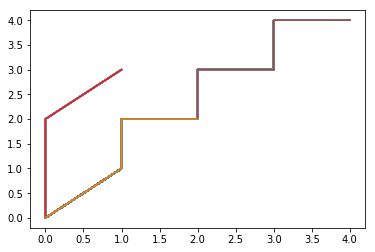

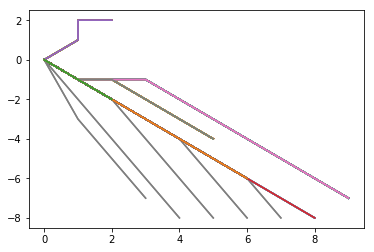

In [134]:
import matplotlib.pyplot as plt
import numpy as np

for snippet in jumps:
    path = np.array(snippet)
    path[:,0] -= path[0,0]
    path[:,1] -= path[0,1]
    plt.plot(path[:,0],path[:,1])
plt.show()


for snippet in falls:
    path = np.array(snippet)
    path[:,0] -= path[0,0]
    path[:,1] -= path[0,1]
    plt.plot(path[:,0],path[:,1])
plt.show()

In [132]:
import statsmodels.api as sm

[ 1.52484667 -0.13711021] [ 55.78654899 -14.26547203]


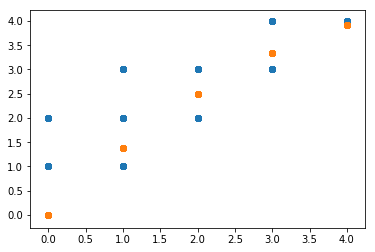

[-0.13124125] [-104.18771382]


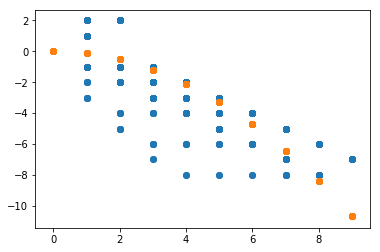

In [142]:
jump_data = []
for snippet in jumps:
    path = np.array(snippet)
    path[:,0] -= path[0,0]
    path[:,1] -= path[0,1]
    jump_data.append(path)
jump_data = np.vstack(jump_data)
jump_X = np.hstack([jump_data[:,0].reshape([-1,1]),jump_data[:,0].reshape([-1,1])**2])
jump_Y = jump_data[:,1].reshape([-1,1])

jump_model = sm.OLS(jump_Y,jump_X)
jump_results = jump_model.fit()
print(jump_results.params,jump_results.tvalues)
plt.scatter(jump_X[:,0],jump_Y)
plt.scatter(jump_X[:,0],np.dot(jump_X,jump_results.params))
plt.show()

fall_data = []
for snippet in falls:
    path = np.array(snippet)
    path[:,0] -= path[0,0]
    path[:,1] -= path[0,1]
    fall_data.append(path)
fall_data = np.vstack(fall_data)
fall_X = fall_data[:,0].reshape([-1,1])**2
fall_Y = fall_data[:,1].reshape([-1,1])

fall_model = sm.OLS(fall_Y,fall_X)
fall_results = fall_model.fit()
print(fall_results.params,fall_results.tvalues)
plt.scatter(fall_data[:,0],fall_Y)
plt.scatter(fall_data[:,0],np.dot(fall_X,fall_results.params))
plt.show()

81
